#  ***Bank Marketing Campaign - Exploratory Data Analysis*** 
    
- In this part of the project I will explore the portuguese bank marketing campaign dataset with some visualiazation techniques in order to define the selection of variables that are going to be used for the machine learning section. 

## Marketing Campaign Recap:

- The research focus on targeting through telemarketing phone calls to sell long-term deposits with attractive interest rates. In the campaign,
    the bank agent execute phone calls to a list of clients to see if they are interested to subscribe for a 
    long-term deposit. The result is a binary answer, 'yes' or 'no'.
    
## The Dataset:

- The dataset is composed of 21 variables, 20 independent variables ranging from numeric to categorical, such as
    job, marital status, month, amount of times client was contacted, age and others. And 1 binary dependent 
    variable, if client subscribed 'yes' or 'no'.


## Findings:

 - The exploration analysis was able to identify variables that have a meaningful impact in subscribing a 
    client to a long term deposit, these variables are: job category, month of the year, call duration, if they have 
    previously subscribed to a campaign, quaterly interest rate and quaterly number of employed.
    
    1. Job category - The categories with the highest subscribed rate were students (31%), retired (25%) and unemployed (14%). Interesting enough, these are the categories of people that do not have a job.
    
    2. Month of the year - It was interesting to notice that some months had over 50% subscribed rate, such as March, December and September. Also, May, the month with the highest amount of subscribers had the worst subscribed rate with only 6.4% subscribing.
    
    3. Call Duration - The duration of the call has a significant impact in subscribing a client. The most of the calls that didn't end in subscription last at most 279 seconds, while the lower quartile of the calls that got people subscribed was 253 seconds. Therefore, the longer the agent stayed on the month with the client, the higher the chance on subscribing.
    
    4. If client previously subscribed to a campaign - If a client had previously subscribed to a campaign from this bank, there is a high chance of subscribing again, as 65% of those who have subscribed to a previous campaign have subscribed again.
    
    5. Interest rate (Daily indicator) - There is a significant correlation that the lower the interest rate the more subscribers. This could be because the long term deposit with high interest rate becomes more enticing with the low average interest rates. In addition, there is a strong correlation between the months with the highest subscribed rate and low interest rate. 
    
    6. Number of employed (Quaterly indicator) - The less people employed in the economy, the more subscribers. Similar to what the job category shows, the people that are most likely to subscribed are the people without job. Thus, a higher number of unemployed people, the higher the subscribed rate.
    

## What's Next:
- Given the findings above, the next step is to use machine learning to identify how strong these correlations are and if we are able to predict what clients are going to subscribe.

    
## The Experiments and the Data:


### Importing Libraries

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Converting the dataset from CSV to Dataframe, using pandas.

In [4]:
bank = pd.read_csv('Desktop/Data Science - Springboard/Capstone Project - 1/portuguese_bank_project/bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Analyzing data types

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Convert data types for easier data manipulation
1. Convert all the numeric columns to integers
2. Convert string columns into categorical columns

In [6]:
bank_int = bank[['age','campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

for i in bank_int:
    bank[i] = pd.to_numeric(bank[i])

In [84]:
bank_category = bank[['job', 'marital', 'education', 'contact', 'month', 'day_of_week']]

for i in bank_category:
    bank[i] = bank_category[i].astype('category')

### Functions and data samples used in the project
- Two functions were created to facilitate the exploration analysis.
    1. percentage() - It's a function to get the percentage of a value in a data sample against the 
        value in the dataset. 
    2. boxplot_stats() - This function will print a short stats summary from a boxplot: lower and 
        upper quartile and median values.
- Two data samples were created to distinguish the binary output in the dependent variable:
    - bank_y - It's a data sample containing only those who have subscribed to the program.
    - bank_n - It's a data sample containging only those who didn't subscribed to the program.

In [8]:
# Functions
def percentage(df, column, df_1):
    # The goal of this function is to get the percentage of a value in a data sample against the value in the whole
    # data set.
    # This will be done by calculating the value counts in a population sample divided by the value counts
    # in the population.
    
    return df[column].value_counts() / df_1[column].value_counts() * 100

def boxplot_stats(type_subscribed, df, column):
    # Print boxplot stats - lower and upper quartile, and median values.
    
    print('{} Boxplot stats: \n'.format(type_subscribed))
    print('Median - {}'.format(df[column].median()))
    print('Lower Quartile - {}'.format(df[column].quantile(0.25)))
    print('Upper Quartile - {}'.format(df[column].quantile(0.75)))
    
# Data samples
bank_y = bank[bank.y == 'yes']  # Subscribed to the campaign
bank_n = bank[bank.y == 'no']   # Didn't subscribe to the campaign    


## ***Exploring Bank Services Variables*** 

### Clients who have defaulted in a loan over subscribing:
- Default Loan - Most of the people that subscribed to the program have not defaulted 
    on their loan. 

In [9]:
bank_y['default'].value_counts()

no         4197
unknown     443
Name: default, dtype: int64

In [10]:
percentage(bank_y, 'default', bank)

no         12.878974
unknown     5.152960
yes              NaN
Name: default, dtype: float64

### Clients who have a housing loan over subscribing
- Housing Loan - The amount of people that have or dont have a housing loan and participated are very similar.
    Therefore, no correlation that having housing loan makes someone more likely to subscribed.

In [11]:
bank_y['housing'].value_counts()

yes        2507
no         2026
unknown     107
Name: housing, dtype: int64

In [12]:
percentage(bank_y, 'housing', bank)

yes        11.619392
no         10.879605
unknown    10.808081
Name: housing, dtype: float64

### Clients who have a loan over subscribing
- Most people that have subscribed to the program have a loan with the bank.
    - However, the population percentage is not that great.

In [13]:
bank_y['loan'].value_counts()

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [14]:
percentage(bank_y, 'loan', bank)

no         11.340206
yes        10.931498
unknown    10.808081
Name: loan, dtype: float64

## ***Exploring categorical variables***


### Job category over subscribing
- Most people that have subscribed to the program have an admin job. 
- However, an interesting finding is that the job categories that are most likely to subscribe to the program
    are student, retired and unemployed. Thus, this data shows that there might be a correlation with those that 
    are not working with subscribing to the program.

In [15]:
bank_y.job.value_counts()

admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

In [16]:
pct_job = percentage(bank_y, 'job', bank).sort_values(ascending=False)
pct_job

student          31.428571
retired          25.232558
unemployed       14.201183
admin.           12.972558
management       11.217510
unknown          11.212121
technician       10.826042
self-employed    10.485574
housemaid        10.000000
entrepreneur      8.516484
services          8.138070
blue-collar       6.894316
Name: job, dtype: float64

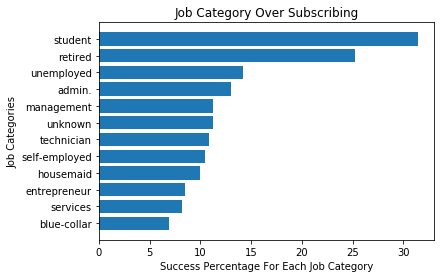

In [79]:
plt.barh(pct_job.index, pct_job.values)
plt.xlabel('Success Percentage For Each Job Category')
plt.ylabel('Job Categories')
plt.title('Job Category Over Subscribing')
plt.gca().invert_yaxis()
plt.show()

### Level of education over subscribing
- Most people that subscribed have a university degree.
- However, when comparing against the whole data set, Illiterate has the highest subscribing percentage, 
    with 22% subscribing to the program. While university degree has a 13% subscription rate. 

In [18]:
bank_y.education.value_counts()

university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

In [19]:
percentage(bank_y, 'education', bank)

basic.4y               10.249042
basic.6y                8.202443
basic.9y                7.824648
high.school            10.835523
illiterate             22.222222
professional.course    11.348465
university.degree      13.724523
unknown                14.500289
Name: education, dtype: float64

### Type of contact over subscribing
- 83% of the subscription were obtained by calling to client's cellular phones
    - Calls to cellular have a total subscription rate of 14% while telephone has only 5%. 

In [20]:
bank_y.contact.value_counts()

cellular     3853
telephone     787
Name: contact, dtype: int64

In [21]:
bank_y.contact.value_counts(normalize=True) * 100

cellular     83.038793
telephone    16.961207
Name: contact, dtype: float64

In [22]:
percentage(bank_y, 'contact', bank)

cellular     14.737607
telephone     5.231321
Name: contact, dtype: float64

### Month of the year over subscribing
- May was the month with the most subscription, however it was also the month with the lowest subscription 
    rate, with only 6% subscribing.
- The months with the best subscription rate were March, September, October and December. These months 
    had a success rate of near 50%!

In [23]:
bank_y.month.value_counts()

may    886
aug    655
jul    649
jun    559
apr    539
nov    416
oct    315
mar    276
sep    256
dec     89
Name: month, dtype: int64

In [24]:
bank_y.month.value_counts(normalize=True) * 100

may    19.094828
aug    14.116379
jul    13.987069
jun    12.047414
apr    11.616379
nov     8.965517
oct     6.788793
mar     5.948276
sep     5.517241
dec     1.918103
Name: month, dtype: float64

In [82]:
pct_month = percentage(bank_y, 'month', bank).sort_values(ascending=False)
pct_month

mar    50.549451
dec    48.901099
sep    44.912281
oct    43.871866
apr    20.478723
aug    10.602137
jun    10.511470
nov    10.143867
jul     9.046557
may     6.434745
Name: month, dtype: float64

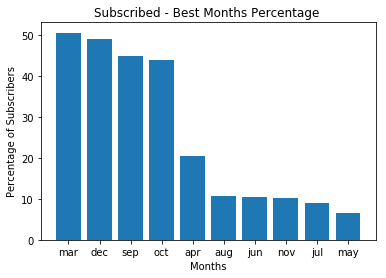

In [80]:
plt.bar(pct_month.index, pct_month.values)
plt.title('Subscribed - Best Months Percentage ')
plt.ylabel('Percentage of Subscribers')
plt.xlabel('Months')
plt.show()

### Day of the week over subscribing
- The data for the day of the week is well distributed, not showing any significant impact on subscription.

In [26]:
bank_y.day_of_week.value_counts()

thu    1045
tue     953
wed     949
mon     847
fri     846
Name: day_of_week, dtype: int64

In [27]:
percentage(bank_y, 'day_of_week', bank)

fri    10.808739
mon     9.948320
thu    12.118752
tue    11.779975
wed    11.667076
Name: day_of_week, dtype: float64

## ***Exploring Numeric variables***

### Client's age over subscribing
- Most subscribers are around 30 years old. 
- However, when comparing the subscribed data sample with the dataset, age doesn't seem to have a 
    significant impact.

In [28]:
age_y = bank_y.age.value_counts()
age_y = age_y.sort_index()

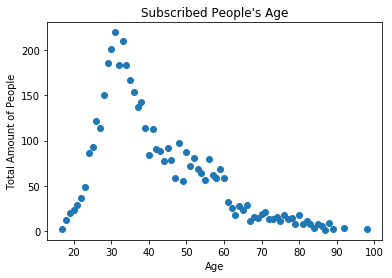

In [29]:
plt.scatter(age_y.index, age_y.values)
plt.title('Subscribed People\'s Age')
plt.ylabel('Total Amount of People')
plt.xlabel('Age')
plt.show()

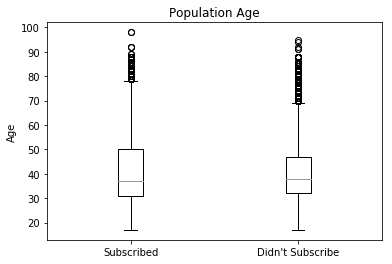

In [30]:
age_bank_comp = [bank_y.age, bank_n.age]
plt.boxplot(age_bank_comp)
plt.title('Population Age')
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Age')
plt.show()

In [31]:
boxplot_stats('Subscribed', bank_y, 'age')

Subscribed Boxplot stats: 

Median - 37.0
Lower Quartile - 31.0
Upper Quartile - 50.0


In [32]:
boxplot_stats('Didn\'t Subscribed', bank_n, 'age')

Didn't Subscribed Boxplot stats: 

Median - 38.0
Lower Quartile - 32.0
Upper Quartile - 47.0


#### Call duration over subscribing
- There seems to be a high correlation with longer calls and of client subscribing. 
- The median duration of calls in the subscribed data sample is of 449 seconds, while the median in the 
    dataset is only 163, which is the less than the lower quartile of subscribed data sample.

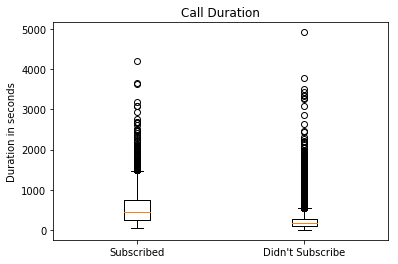

In [33]:
duration_comp = [bank_y.duration, bank_n.duration]
plt.boxplot(duration_comp)
plt.title('Call Duration')
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Duration in seconds')
plt.show()

In [34]:
boxplot_stats('Subscribed', bank_y, 'duration')

Subscribed Boxplot stats: 

Median - 449.0
Lower Quartile - 253.0
Upper Quartile - 741.25


In [35]:
boxplot_stats('Didn\'t Subscribe', bank_n, 'duration')

Didn't Subscribe Boxplot stats: 

Median - 163.5
Lower Quartile - 95.0
Upper Quartile - 279.0


### Number of calls over subscribing
- Most clients subscribed with less than 2 calls. 
    - With the scatterplot we can see that the amount of subscribers decline significantly when more 
        than 2 calls were made.

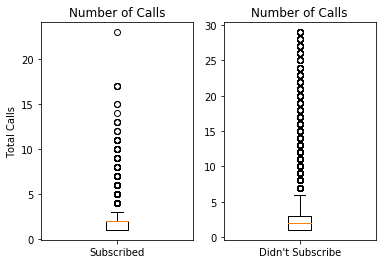

In [36]:
plt.subplot(1,2,1)
plt.boxplot(bank_y.campaign)
plt.title('Number of Calls')
plt.xticks([1], ['Subscribed'])
plt.ylabel('Total Calls')
plt.subplot(1,2,2)
plt.boxplot(bank_n.campaign[bank_n.campaign < 30])
plt.xticks([1], ['Didn\'t Subscribe'])
plt.title('Number of Calls')
plt.show()



In [37]:
boxplot_stats('Subscribed', bank_y, 'campaign')

Subscribed Boxplot stats: 

Median - 2.0
Lower Quartile - 1.0
Upper Quartile - 2.0


In [38]:
boxplot_stats('Didn\'t Subscribe', bank_n, 'campaign')

Didn't Subscribe Boxplot stats: 

Median - 2.0
Lower Quartile - 1.0
Upper Quartile - 3.0


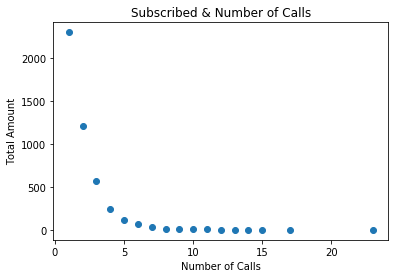

In [39]:
number_contacts = bank_y.campaign.value_counts()

plt.scatter(number_contacts.index, number_contacts.values)
plt.title('Subscribed & Number of Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Total Amount')
plt.show()

### Number of days passed by after client was last contact over subscribing
- Most of the clients who have signed up were not contacted previously.
    - 999 means that they were not contacted previously by the bank.
- If the client hasn't been contacted by the bank previously, the ideal time to contact a client is after 3-6 
    from the last campaign.
    - Contacting a lead 1 day after the last contact, seems to decrease the chance of subscribing

In [40]:
bank_y.pdays.value_counts().head(10)

999    3673
3       298
6       289
4        63
7        40
2        37
9        35
10       30
5        29
13       28
Name: pdays, dtype: int64

In [70]:
bank_y.pdays.value_counts(normalize=True).head(10)*100

999    79.159483
3       6.422414
6       6.228448
4       1.357759
7       0.862069
2       0.797414
9       0.754310
10      0.646552
5       0.625000
13      0.603448
Name: pdays, dtype: float64

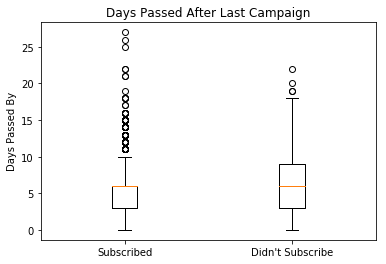

In [41]:
pdays_comp = [bank_y.pdays[bank_y.pdays != 999], bank_n.pdays[bank_n.pdays != 999]]
plt.boxplot(pdays_comp)
plt.title('Days Passed After Last Campaign')
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Days Passed By')
plt.show()

In [42]:
boxplot_stats('Subscribed', bank_y.pdays, bank_y.pdays != 999)

Subscribed Boxplot stats: 

Median - 6.0
Lower Quartile - 3.0
Upper Quartile - 6.0


In [43]:
boxplot_stats('Didn\'t Subscribe', bank_n.pdays, bank_n.pdays != 999)

Didn't Subscribe Boxplot stats: 

Median - 6.0
Lower Quartile - 3.0
Upper Quartile - 9.0


### If client has previously subscribed to a campaign over subscribing (current campaign)
- Most of the signups came from those who were not offered anything previously.
- 65% of the clients that have previously subscribed to a campaign have enrolled in the current campaign.

In [44]:
bank_y.poutcome.value_counts()

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

In [45]:
percentage(bank_y, 'poutcome', bank)

failure        14.228598
nonexistent     8.832213
success        65.112891
Name: poutcome, dtype: float64

## ***Exploring Economic Indicator variables***

### Employment variation rate (Quaterly Indicator) over subscribing
- The lower the employment variation rate the more subscribers. 

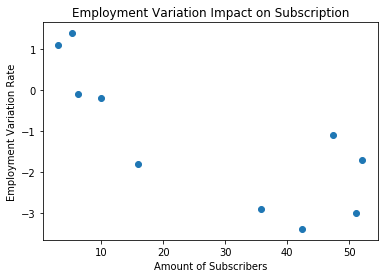

In [88]:
pct_employment = percentage(bank_y, 'emp.var.rate', bank)

plt.scatter(pct_employment.values,pct_employment.index)
plt.title('Employment Variation Impact on Subscription')
plt.ylabel('Employment Variation Rate')
plt.xlabel('Amount of Subscribers')
plt.show()

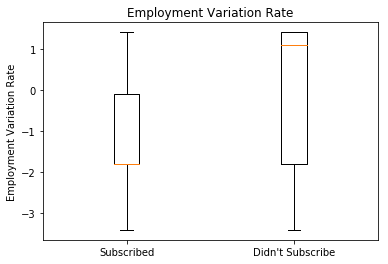

In [47]:
emp_var_comp = [bank_y['emp.var.rate'], bank_n['emp.var.rate']]
plt.boxplot(emp_var_comp)
plt.title('Employment Variation Rate')
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Employment Variation Rate')
plt.show()

In [48]:
boxplot_stats('Subscribed', bank_y, 'emp.var.rate')

Subscribed Boxplot stats: 

Median - -1.8
Lower Quartile - -1.8
Upper Quartile - -0.1


In [49]:
boxplot_stats('Didn\'t Subscribe', bank_n, 'emp.var.rate')

Didn't Subscribe Boxplot stats: 

Median - 1.1
Lower Quartile - -1.8
Upper Quartile - 1.4


### Consumer price index (Monthly Indicator) over subscribing
- There seems to be a small correlation with lower Consumer Price Index and subscribing

In [50]:
consumer_idx = bank_y['cons.price.idx'].value_counts().sort_index()
consumer_idx.head()

92.201    264
92.379    106
92.431    180
92.469     66
92.649    168
Name: cons.price.idx, dtype: int64

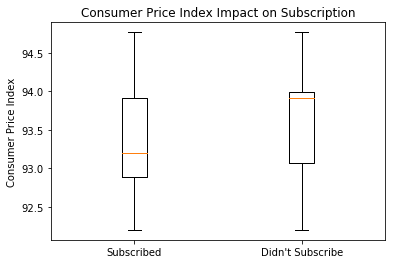

In [51]:
consumer_idx = [bank_y['cons.price.idx'], bank_n['cons.price.idx']]
plt.boxplot(consumer_idx)
plt.title('Consumer Price Index Impact on Subscription')
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Consumer Price Index')
plt.show()

In [52]:
boxplot_stats('Subscribed', bank_y, 'cons.price.idx')

Subscribed Boxplot stats: 

Median - 93.2
Lower Quartile - 92.89299999999999
Upper Quartile - 93.91799999999999


In [53]:
boxplot_stats('Didn\'t Subscribe', bank_n, 'cons.price.idx')

Didn't Subscribe Boxplot stats: 

Median - 93.91799999999999
Lower Quartile - 93.075
Upper Quartile - 93.994


### Consumer confidence index (Monthly Indicator) over subscribing

In [73]:
percentage(bank_y, 'cons.conf.idx', bank).head()

-50.8    45.312500
-50.0    44.680851
-49.5    45.588235
-47.1    17.982099
-46.2     9.043838
Name: cons.conf.idx, dtype: float64

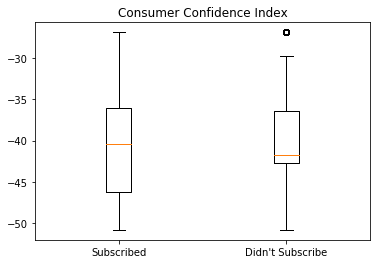

In [74]:
consumer_conf_idx = [bank_y['cons.conf.idx'], bank_n['cons.conf.idx']]
plt.boxplot(consumer_conf_idx)
plt.title('Consumer Confidence Index')
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.show()

In [75]:
boxplot_stats('Subscribed', bank_y, 'cons.conf.idx')

Subscribed Boxplot stats: 

Median - -40.4
Lower Quartile - -46.2
Upper Quartile - -36.1


In [76]:
boxplot_stats('Didn\'t Subscribe', bank_n, 'cons.conf.idx')

Didn't Subscribe Boxplot stats: 

Median - -41.8
Lower Quartile - -42.7
Upper Quartile - -36.4


### Interest rate (Daily Indicator) over subscribing
- There boxplot shows that there were more subscribers when interest rates were low.
- Since the program is offering 'attractive interest rates' as you deposit money into the bank, it 
    makes sense the lower the interest rate of the Central Bank the more appealing the interest bank 
    from the bank will be.

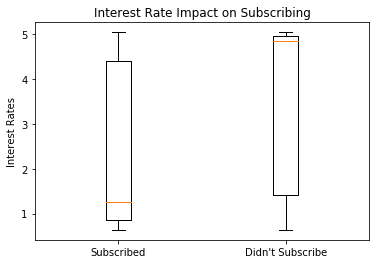

In [78]:
int_rate_comp = [bank_y['euribor3m'], bank_n['euribor3m']]
plt.boxplot(int_rate_comp)
plt.title('Interest Rate Impact on Subscribing')
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Interest Rates')
plt.show()

In [60]:
boxplot_stats('Subscribed', bank_y, 'euribor3m')

Subscribed Boxplot stats: 

Median - 1.266
Lower Quartile - 0.8490000000000001
Upper Quartile - 4.406000000000001


In [61]:
boxplot_stats('Didn\'t Subscribe', bank_y, 'euribor3m')

Didn't Subscribe Boxplot stats: 

Median - 1.266
Lower Quartile - 0.8490000000000001
Upper Quartile - 4.406000000000001


### Employment  number (Quaterly Indicator) over subscribing
- The lower the employment number is, the more subscribers.

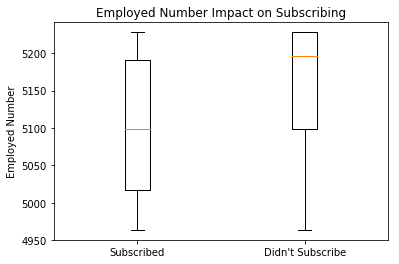

In [62]:
employed_comp = [bank_y['nr.employed'], bank_n['nr.employed']]
plt.boxplot(employed_comp)
plt.title('Employed Number Impact on Subscribing')
plt.xticks([1,2], ['Subscribed', 'Didn\'t Subscribe'])
plt.ylabel('Employed Number')
plt.show()

In [63]:
boxplot_stats('Subscribed', bank_y, 'nr.employed')

Subscribed Boxplot stats: 

Median - 5099.1
Lower Quartile - 5017.5
Upper Quartile - 5191.0


In [64]:
boxplot_stats('Didn\'t Subscribe', bank_y, 'nr.employed')

Didn't Subscribe Boxplot stats: 

Median - 5099.1
Lower Quartile - 5017.5
Upper Quartile - 5191.0


### Worst & Best Months Over Economic Indicators
- Worst months:
    - May, July & Nov
- Best Months: 
    - March, Dec & Sep
- We can see that the best months had much lower interest rates than the worst months.
- Also, number of employed people are lower on the best months. 

In [65]:
# Worst Months
bank_may = bank[bank.month == 'may']
bank_jul = bank[bank.month == 'jul']
bank_nov = bank[bank.month == 'nov']
worst_months_int = [bank_may['euribor3m'], bank_jul['euribor3m'], bank_nov['euribor3m']]
worst_months_employed = [bank_may['nr.employed'], bank_jul['nr.employed'], bank_nov['nr.employed']]

In [66]:
#Best Months
bank_mar = bank[bank.month == 'mar']
bank_dec = bank[bank.month == 'dec']
bank_sep = bank[bank.month == 'sep']
best_months_int = [bank_mar['euribor3m'], bank_dec['euribor3m'], bank_sep['euribor3m']]
best_months_employed = [bank_mar['nr.employed'], bank_dec['nr.employed'], bank_sep['nr.employed']]

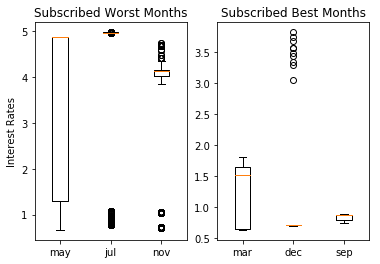

In [67]:
plt.subplot(1,2,1)
plt.boxplot(worst_months_int)
plt.xticks([1,2,3], ['may', 'jul', 'nov'])
plt.title('Subscribed Worst Months')
plt.ylabel('Interest Rates')

plt.subplot(1,2,2)
plt.boxplot(best_months_int)
plt.xticks([1,2,3], ['mar', 'dec', 'sep'])
plt.title('Subscribed Best Months')
plt.show()

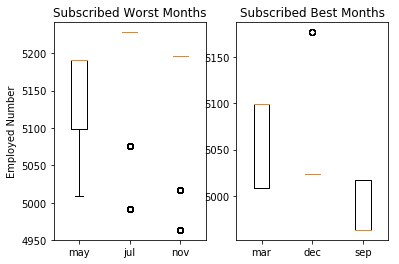

In [68]:
plt.subplot(1,2,1)
plt.boxplot(worst_months_employed)
plt.xticks([1,2,3], ['may', 'jul', 'nov'])
plt.title('Subscribed Worst Months')
plt.ylabel('Employed Number')

plt.subplot(1,2,2)
plt.boxplot(best_months_employed)
plt.xticks([1,2,3], ['mar', 'dec', 'sep'])
plt.title('Subscribed Best Months')
plt.show()